# How to use PCAtomography package

The code is a python version of the algoritm for Principal Component Analyses (PCA) in Integral Field Unit (IFU) Spectrograph data cubes by Steiner et al. 2009 (https://arxiv.org/pdf/0901.2266). It is particularly usefull for 'Intrumental Fingerprint' removal, a proceding explored by Menezes et al. 2014 (https://arxiv.org/abs/1401.7078). The code is avalible at https://github.com/muryelgp/PCAtomography for download.

## Basic functions and how to run the PCA tomography

In [24]:
#importing
from PCAtomography import IFUcube
import os #optional
import numpy as np

import warnings
warnings.filterwarnings("ignore") #ignoring Fits imcompabilities

In [25]:
#loading a IFU data cube (.fits file)
folder = './cubes/'
cube_name = 'ngc3081_HYPERCUBE.fits' 
fname = os.path.join(folder, cube_name)

#Instantiating IFUcube object
cube = IFUcube(fname)



### Running PCA tomography

In [26]:
cube.run_pca(write_fits = False, out_ext='_PCA')

--------------------------------------------
IT CAN TAKE SOME TIME AND SOME MEMORY!
--------------------------------------------
DONE!


You can inspect the components tomograms and Eigenvectors by using '.plot_tomogram(component)',
the component numbers starts at 1.

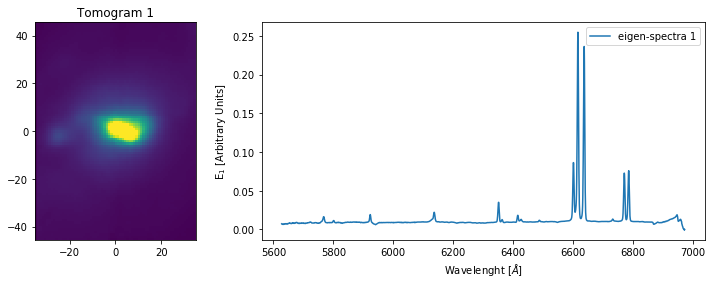

In [27]:
cube.plot_tomogram(1)

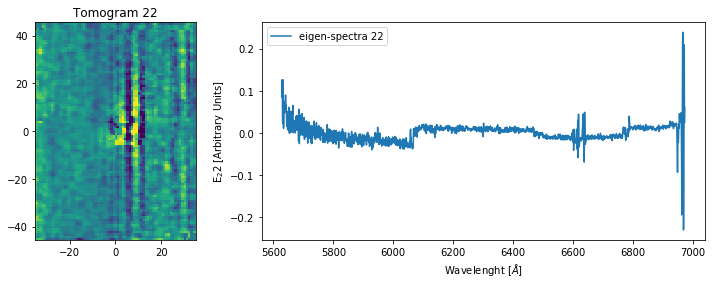

In [28]:
cube.plot_tomogram(22)

The scree test plot (see Steiner et al. 2009, for details) can be plot with '.plot_scree_test()'

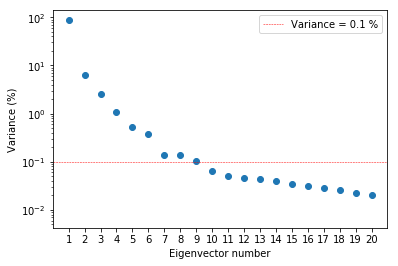

In [29]:
cube.plot_scree_test(components = 20)

When usefull you can load a fits resulting from the '.run_pca()', by using '.read_pca()'

In [6]:
PCA_cube_name = 'ngc3081_HYPERCUBE_PCA.fits'

cube = IFUcube.read_pca(os.path.join(folder, PCA_cube_name))

You can get a component tomogram or a eigenvector by doing:

In [30]:
tomogram_1 = cube.get_tomogram(1)

eigenvector_20 = cube.get_eigenvector(20)
print(eigenvector_20)

[-0.03041929 -0.04639836 -0.09413735 ...  0.18915046  0.04493349
  0.07975662]


# 'Instrumental Fingerprints' Removal

The .clean_data() method allows the removal of components from the data cube, it is particularly useful for 'instrumental fingerprint' removal from IFU cubes, the methods is described in Menezes et al. 2018 section 6: https://academic.oup.com/mnras/article/438/3/2597/973582#91824382b

For example we assume that components 22 is an instrumental signature (or finger prints), we can remove it from the data by doing the following (be carefull in these assumptions):

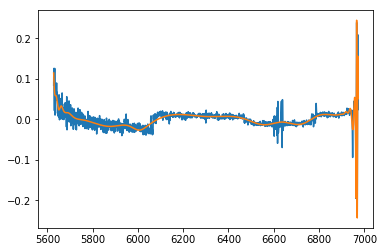

In [34]:
clean_data = cube.clean_data([22],  smoothing_factor=0.2)
#it plots the spline fitting if fit_spline = True (default) and returns the clean cube.data array